In [163]:
## Import entire libraries

import pandas as pd
import numpy as np

#library for plotting stuff
import matplotlib.pyplot as plt
#so that plots appear in the same browser window
%matplotlib inline


## Import specific items only from the sklearn library

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

In [164]:
# Read the data from a file
df0 = pd.read_csv('four-column498.csv')

In [165]:
print(type(df0))
print(df0.shape)
df0.head(10)

<class 'pandas.core.frame.DataFrame'>
(497, 4)


,Commentaire,Classe,Date,url
0,عسلامة أورونج رقدت مخلي ال puce متاعي أورونج ق...,negative,2018-01-02T19:16:17+0000,https://www.facebook.com/298166859034_10155976...
1,اورونج نحب نقلكم عيشكم خاتر انتوما الوحدين\nتت...,negative,2018-01-02T19:43:48+0000,https://www.facebook.com/298166859034_10155976...
2,brabi orange pk l connexion ma t7ebech temchil...,negative,2018-01-02T20:37:47+0000,https://www.facebook.com/298166859034_10155976...
3,slm orange elyoum 3adet fourfi 900 ta3 7 jour ...,negative,2018-01-02T19:00:49+0000,https://www.facebook.com/298166859034_10155976...
4,N7eb orange,positive,2018-01-08T20:13:49+0000,https://www.facebook.com/298166859034_10155991...
5,حزين,negative,2018-01-08T19:15:36+0000,https://www.facebook.com/298166859034_10155991...
6,نسالكم 70 ميغاا الله لا تربحكم انتم باش تربحوو...,negative,2018-01-02T19:11:40+0000,https://www.facebook.com/298166859034_10155976...
7,Problème de connexion avec les sites internati...,negative,2018-01-09T18:10:08+0000,https://www.facebook.com/298166859034_10155990...
8,bon orange pk la connexion t7bch temchi ken fa...,negative,2018-01-02T20:47:32+0000,https://www.facebook.com/298166859034_10155976...
9,3aslma orange belhy n7eb na3ref 3lach ne7etow ...,negative,2018-01-02T21:43:12+0000,https://www.facebook.com/298166859034_10155976...


In [166]:
#We can also use the info() method to obtain a summary of a pandas Data Frame
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 4 columns):
Commentaire    494 non-null object
Classe         497 non-null object
Date           495 non-null object
url            495 non-null object
dtypes: object(4)
memory usage: 15.6+ KB


In [167]:
X_train = df0.values[:,:-2]
X_train

array([[ 'عسلامة أورونج رقدت مخلي ال puce متاعي أورونج قمت نلقاها تبدلت أوريدو بلاهي كيفاش نبدلها تليكوم',
        'negative'],
       [ 'اورونج نحب نقلكم عيشكم خاتر انتوما الوحدين\nتتفكروني\nتعيدو عليا قبل عيلتي\nو مبعد تبعثولي ميساج تقولولي راهو فلوسك وفاو\nتعرف الي انا مبارح صبيت دينار ياخي سرقتوه تعرفووووو...😠😠\nمصح الرقعة 😑\nكان جيت انجم نقتل واحد راني مشيت طول انلوج الي يبعثلي مساج يقلي فيه راهو فلوسك وفاو😈\nو شكرا .....\nمن دون تصفيق 😂😂',
        'negative'],
       [ 'brabi orange pk l connexion ma t7ebech temchili kan fcbk 7ata le messenger ma najemtech na3mlelha téléchargement en plus le play store ma 7abech chniya ilmochkla brabi',
        'negative'],
       [ 'slm orange elyoum 3adet fourfi 900 ta3 7 jour tan7tli 1800 maya a3lech na7touhem dima tasrli hadi',
        'negative'],
       ['N7eb orange', 'positive'],
       ['حزين', 'negative'],
       [ 'نسالكم 70 ميغاا الله لا تربحكم انتم باش تربحوو الشعب يا متحيلين ان شاء الله 70 ميغاا تطلعلكم 70 مليار خسارة',
        'neg

In [168]:
# In order to speed up computation, we'll only use a small random sample
#   of this data comprising 10 % of the rows.
df = df0.sample(frac=0.1, random_state=250)

print(df.shape)
df.head()

(50, 4)


,Commentaire,Classe,Date,url
323,ma famesh huawei mate 10 lite lel rebeh wala S...,negative,2018-01-09T20:50:25+0000,https://www.facebook.com/298166859034_10155994...
248,intouma ya lorange 9a3din tisir9ou kan.fi flou...,negative,2017-12-26T12:58:01+0000,https://www.facebook.com/298166859034_10155953...
306,bravo,positive,2018-01-11T21:36:55+0000,https://www.facebook.com/298166859034_10155999...
137,ana 3andi airbox bil fatour jim3a w9aset mnha ...,negative,2017-12-30T18:20:43+0000,https://www.facebook.com/298166859034_10155962...
475,5eyba 😠,negative,2018-01-11T22:05:00+0000,https://www.facebook.com/298166859034_10156001...


In [169]:
# The describe() method gives a numeric summary of numeric columns (attributes) only
#30 == 300
df.describe()

,Commentaire,Classe,Date,url
count,50,50,50,50
unique,50,2,47,25
top,bravooo,negative,2018-01-11T22:05:00+0000,https://www.facebook.com/298166859034_10155999...
freq,1,30,4,7


In [170]:
from collections import Counter
counter = Counter(df['Classe']).most_common()

#number of Classe
print(len(counter))

2


In [171]:
gR = df.groupby('Classe').size()
print(type(gR))
gR

<class 'pandas.core.series.Series'>


Classe
negative    30
positive    20
dtype: int64

<Container object of 2 artists>

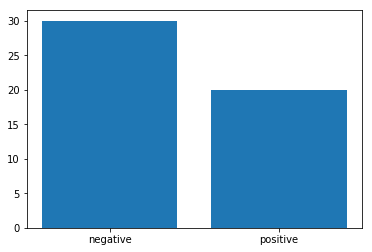

In [172]:
plt.bar(gR.index, gR)

In [150]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Commentaire'], 
                                                    df['Classe'], 
                                                    random_state=591)

In [151]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.series.Series'>
(37,)


In [152]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.series.Series'>
(13,)


In [153]:
X_train.head()

173            الهاتف عندي والنات فيها ضعيفة رغم انها 4g
76     la bonané la chay\n7assnou fel service mte3kom...
226    j'aime beaucoup orange n7ebha wn7eb narbe7 sma...
402                                              bravooo
455    ههههههههههه تدفع 1899 وزيد 200 دينار كل شهر عل...
Name: Commentaire, dtype: object

In [154]:
y_train.head()

173    positive
76     negative
226    positive
402    positive
455    negative
Name: Classe, dtype: object

In [155]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [156]:
vect = CountVectorizer()
# Fit the CountVectorizer to the training data
#  i.e. learn the vocabulary (distinct words) of the input corpus
vect.fit(X_train)
len(vect.get_feature_names())

284

In [157]:
# the document-term matrix for the training corpus
X_train_vectorized = vect.transform(X_train)
print(type(X_train_vectorized))
print(X_train_vectorized.shape)
# the document-term matrix for the test corpus
X_test_vectorized = vect.transform(X_test)
print(type(X_test_vectorized))
print(X_test_vectorized.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(37, 284)
<class 'scipy.sparse.csr.csr_matrix'>
(13, 284)


In [158]:
# Number of non-zero elements in document-term matrix of training corpus
print(X_train_vectorized.nnz)
#print(X_train_vectorized)

321


In [159]:
# Number of training documents that contain each word (called document frequency)
doc_freq = np.array((X_train_vectorized > 0).sum(0))
print(doc_freq.shape)
print(np.amin(doc_freq))
print(np.amax(doc_freq))

(1, 284)
1
12


In [160]:
# Proportion of training documents that contain each word (called relative document frequency)
n,m = X_train_vectorized.shape
rel_doc_freq = np.array((X_train_vectorized > 0).sum(0)/n)

print(rel_doc_freq.shape)
print(np.amin(rel_doc_freq))
print(np.amax(rel_doc_freq))

(1, 284)
0.027027027027
0.324324324324


In [161]:
# Number of unique words in each training document
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(37, 1)
1
35


(array([ 15.,   3.,   8.,   4.,   3.,   2.,   0.,   1.,   0.,   1.]),
 array([  1. ,   4.4,   7.8,  11.2,  14.6,  18. ,  21.4,  24.8,  28.2,
         31.6,  35. ]),
 <a list of 10 Patch objects>)

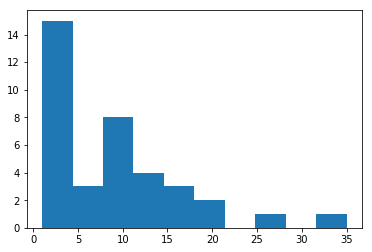

In [162]:
# Plot histogram of number of unique words in each document
plt.hist(words_per_doc)